In [15]:
import pandas as pd
data = pd.read_csv("phase2_results/old_20.csv")
print(data)

   instance  bks   nbh  time      seed  makespan
0      X6_8  147  swap    20   8948803       155
1      X6_8  147  swap    20   9459607       157
2      X6_8  147  swap    20  40594335       163
3      X6_8  147  swap    20  41299189       157
4      X6_8  147  swap    20  55911072       159
..      ...  ...   ...   ...       ...       ...
95    X59_3  108  swap    20  59528639       111
96    X59_3  108  swap    20  61045676       110
97    X59_3  108  swap    20  81907177       111
98    X59_3  108  swap    20  84183543       112
99    X59_3  108  swap    20  85838798       112

[100 rows x 6 columns]


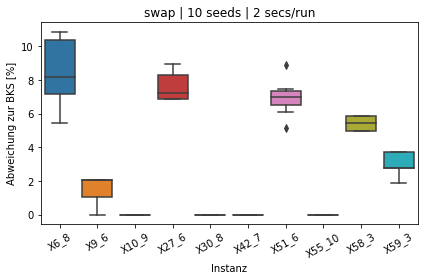

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.boxplot(ax=ax, x=data.instance,  y=(data.makespan/data.bks - 1) * 100)

ax.set(title="swap | 10 seeds | 2 secs/run", xlabel="Instanz", ylabel="Abweichung zur BKS [%]")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()

